This lab on K-Means and Hierarchical Clustering in R is an adaptation of p. 404-407, 410-413 of "Introduction to
Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert
Tibshirani. Adapted by R. Jordan Crouser at Smith College for SDS293: Machine Learning (Spring 2016), and re-implemented in Fall 2016 in `tidyverse` format by Amelia McNamara and R. Jordan Crouser at Smith College.


# 10.5.1 K-Means Clustering
The function `kmeans()` performs K-means clustering in R. We begin with
a simple simulated example in which there truly are two clusters in the
data: the first 25 observations have a mean shift relative to the next 25
observations.

In [2]:
list.of.packages <- c("broom","dplyr","ggdendro","ggplot2","gridExtra","ISLR")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)


In [4]:
set.seed(2)
x = matrix(rnorm(50*2), ncol = 2)

x[1:25,1] = x[1:25,1]+3
x[1:25,2] = x[1:25,2]-4

x = as.data.frame(x)
head(x)

V1,V2
2.103085,-4.838287
3.184849,-1.933699
4.587845,-4.562247
1.869624,-2.724284
2.919748,-5.047573
3.132420,-5.965878


We now perform K-means clustering with `K = 2`:

In [5]:
km_out = kmeans(x, 2, nstart = 20)

The cluster assignments of the 50 observations are contained in
`km_out$cluster`:

In [6]:
km_out$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

The K-means clustering perfectly separated the observations into two clusters
even though we did not supply any group information to `kmeans()`. We
can plot the data, with each observation colored according to its cluster
assignment:


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



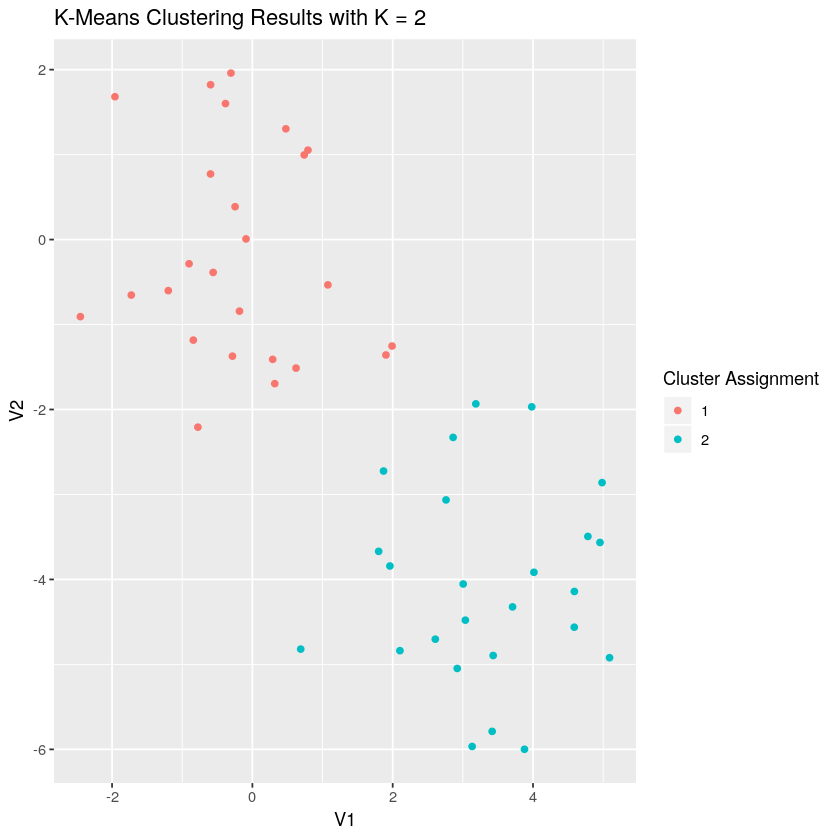

In [7]:
library(ggplot2)
library(dplyr)
library(broom)

assignments <- augment(km_out, x)

ggplot(data = assignments) +
    geom_point(aes(x = V1, y = V2, color = .cluster)) +
    labs(color = "Cluster Assignment",
         title = "K-Means Clustering Results with K = 2")

Here the observations can be easily plotted because they are two-dimensional.
If there were more than two variables then we could instead perform PCA
and plot the first two principal components score vectors.

In this example, we knew that there really were two clusters because
we generated the data. However, for real data, in general we do not know
the true number of clusters. We could instead have performed K-means
clustering on this example with `K  =  3`. If we do this, K-means clustering will split up the two "real" clusters, since it has no information about them:

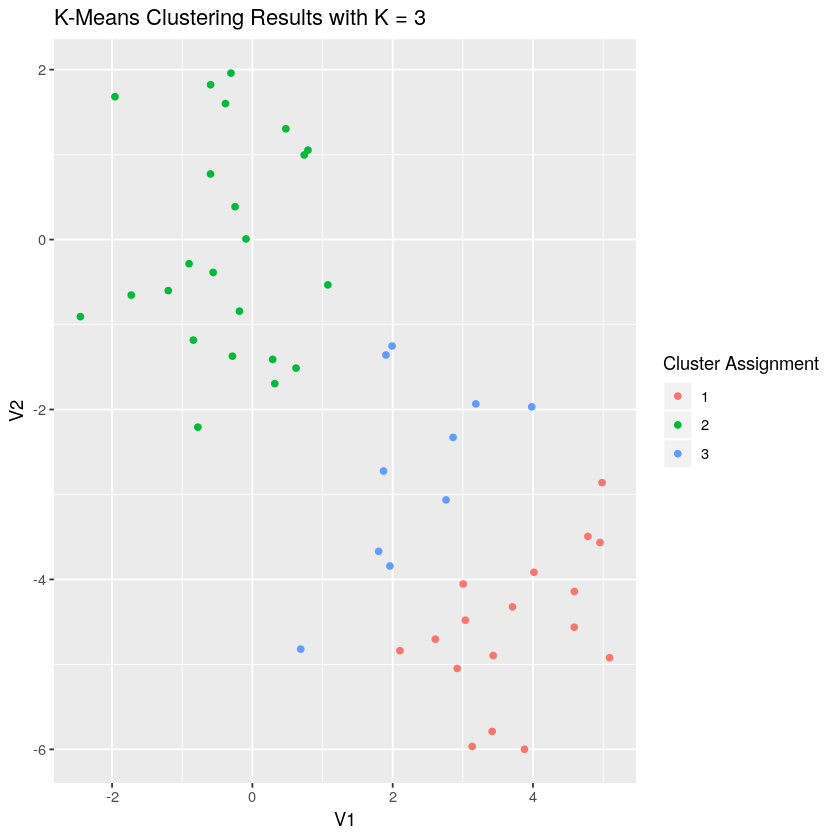

In [8]:
km_out_3clust = kmeans(x, 3, nstart = 20)

assignments_3clust <- augment(km_out_3clust, x)

ggplot(data = assignments_3clust) +
    geom_point(aes(x = V1, y = V2, color = .cluster)) +
    labs(color = "Cluster Assignment",
         title = "K-Means Clustering Results with K = 3")

To run the `kmeans()` function in R with multiple initial cluster assignments,
we use the `nstart` argument. If a value of `nstart` greater than one
is used, then K-means clustering will be performed using multiple random
assignments, and the `kmeans()` function will
report only the best results. Here we compare using `nstart = 1`:

In [9]:
set.seed(3)
km_out_single_run = kmeans(x, 3, nstart = 1)
km_out_single_run$tot.withinss

[1] 104.3319

to `nstart = 20`:

In [10]:
km_out_20_runs = kmeans(x, 3, nstart = 20)
km_out_20_runs$tot.withinss

[1] 97.97927

Note that `km_out$tot.withinss` is the total within-cluster sum of squares,
which we seek to minimize by performing K-means clustering. The individual within-cluster sum-of-squares are contained in the
vector `km_out$withinss`.

It is generally recommended to always run K-means clustering with a large
value of `nstart`, such as 20 or 50 to avoid getting stuck in an undesirable local
optimum.

When performing K-means clustering, in addition to using multiple initial
cluster assignments, it is also important to set a random seed using the
`set.seed()` function. This way, the initial cluster assignments can
be replicated, and the K-means output will be fully reproducible.

# 10.5.2 Hierarchical Clustering
The `hclust()` function implements hierarchical clustering in R. In the following example we use the data from the previous section to plot the hierarchical
clustering dendrogram using complete, single, and average linkage clustering,
with Euclidean distance as the dissimilarity measure. We begin by
clustering observations using complete linkage. The `dist()` function is used
to compute the 50 $\times$ 50 inter-observation Euclidean distance matrix:

In [11]:
hc_complete = hclust(dist(x), method = "complete")

We could just as easily perform hierarchical clustering with average or
single linkage instead:

In [ ]:
hc_average = hclust(dist(x), method = "average")
hc_single = hclust(dist(x), method = "single")

We can now plot the dendrograms obtained using the usual `plot()` function.
The numbers at the bottom of the plot identify each observation:

In [ ]:
library(gridExtra)
library(ggdendro)

plot_complete = ggdendrogram(hc_complete, rotate = FALSE, size = 2) + labs(title = "Complete Linkage") 
plot_average = ggdendrogram(hc_average, rotate = FALSE, size = 2) + labs(title = "Average Linkage")
plot_single = ggdendrogram(hc_single, rotate = FALSE, size = 2) + labs(title = "Single Linkage")

grid.arrange(plot_complete, plot_average, plot_single)

To determine the cluster labels for each observation associated with a
given cut of the dendrogram, we can use the `cutree()` function:

In [ ]:
cutree(hc_complete, 2)
cutree(hc_average, 2)
cutree(hc_single, 2)

For this data, complete and average linkage generally separate the observations
into their correct groups. However, single linkage identifies one point
as belonging to its own cluster. A more sensible answer is obtained when
four clusters are selected, although there are still two singletons:

In [ ]:
cutree(hc_single, 4)

To scale the variables before performing hierarchical clustering of the
observations, we can use the `scale()` function:

In [ ]:
xsc = scale(x)

ggdendrogram(hclust(dist(xsc), method = "complete"), 
             rotate = FALSE, 
             size = 2) + 
labs(title = "Complete Linkage with Scaled Features")

Correlation-based distance can be computed using the `as.dist()` function, which converts an arbitrary square symmetric matrix into a form that
the `hclust()` function recognizes as a distance matrix. However, this only
makes sense for data with **at least three features** since the absolute correlation
between any two observations with measurements on two features is
always 1. Let's generate and cluster a three-dimensional data set:

In [ ]:
x = matrix(rnorm(30*3), ncol = 3)
x_with_correlation_based_distance = as.dist(1 - cor(t(x)))

ggdendrogram(hclust(x_with_correlation_based_distance, method = "complete"), 
             rotate = FALSE, 
             size = 2) + 
labs(title = "Complete Linkage with Correlation-Based Distance")

# 10.6: NCI60 Data Example

Unsupervised techniques are often used in the analysis of genomic data. In this portion of the lab, we'll see how hierarchical and K-means clustering compare on the `NCI60` cancer cell line microarray data, which
consists of 6,830 gene expression measurements on 64 cancer cell lines:

In [ ]:
# The NCI60 data
library(ISLR)
nci_labels = NCI60$labs
nci_data = NCI60$data

Each cell line is labeled with a cancer type. We'll ignore the
cancer types in performing clustering, as these are unsupervised
techniques. After performing clustering, we'll use this column to see the extent to which these cancer types agree with the results of these
unsupervised techniques.

The data has 64 rows and 6,830 columns.

In [ ]:
dim(nci_data)

Let's take a look at the cancer types for the cell lines:

In [ ]:
table(nci_labels)

# 10.6.2 Clustering the Observations of the NCI60 Data
We now proceed to hierarchically cluster the cell lines in the `NCI60` data,
with the goal of finding out whether or not the observations cluster into
distinct types of cancer. To begin, we standardize the variables to have
mean zero and standard deviation one. This step is
optional, and need only be performed if we want each gene to be on the
same scale:

In [ ]:
scaled_nci_data = scale(nci_data)

We now perform hierarchical clustering of the observations using complete,
single, and average linkage. We'll use standard Euclidean distance as the dissimilarity
measure:

In [ ]:
nci_hc_complete = hclust(dist(scaled_nci_data), method = "complete")
nci_hc_average = hclust(dist(scaled_nci_data), method = "average")
nci_hc_single = hclust(dist(scaled_nci_data), method = "single")


plot_complete_nci = ggdendrogram(nci_hc_complete, rotate = FALSE, size = 2) + labs(title = "NCI: Complete Linkage") 
plot_average_nci = ggdendrogram(nci_hc_average, rotate = FALSE, size = 2) + labs(title = "NCI: Average Linkage")
plot_single_nci = ggdendrogram(nci_hc_single, rotate = FALSE, size = 2) + labs(title = "NCI: Single Linkage")

grid.arrange(plot_complete_nci, plot_average_nci, plot_single_nci)

We see that the choice of linkage
certainly does affect the results obtained. Typically, single linkage will tend
to yield trailing clusters: very large clusters onto which individual observations
attach one-by-one. On the other hand, complete and average linkage
tend to yield more balanced, attractive clusters. For this reason, complete
and average linkage are generally preferred to single linkage. Clearly cell
lines within a single cancer type do tend to cluster together, although the
clustering is not perfect. 

Let's use our complete linkage hierarchical clustering
for the analysis. We can cut the dendrogram at the height that will yield a particular
number of clusters, say 4:

In [ ]:
hc_clusters = cutree(nci_hc_complete, 4)
table(nci_labels, hc_clusters)

There are some clear patterns. All the leukemia cell lines fall in cluster 3,
while the breast cancer cell lines are spread out over three different clusters.
We can plot the cut on the dendrogram that produces these four clusters by adding a `geom_hline()`, which draws a horizontal line on top of our plot:

In [ ]:
ggdendrogram(nci_hc_complete, rotate = FALSE, size = 2) + 
    labs(title = "NCI: Complete Linkage") +
    geom_hline(yintercept = 139, color = "red")

Printing the output of `hclust` gives a useful brief summary of the object:

In [ ]:
nci_hc_complete

We claimed earlier that K-means clustering and hierarchical
clustering with the dendrogram cut to obtain the same number
of clusters can yield **very** different results. How do these `NCI60` hierarchical
clustering results compare to what we get if we perform K-means clustering
with `K = 4`?

In [ ]:
set.seed(2)
km_out = kmeans(scaled_nci_data, 4, nstart = 20)
km_clusters = km_out$cluster

We can use a confusion matrix to compare the differences in how the two methods assigned observations to clusters:

In [ ]:
table(km_clusters, hc_clusters)

We see that the four clusters obtained using hierarchical clustering and Kmeans
clustering are somewhat different. Cluster 2 in K-means clustering is
identical to cluster 3 in hierarchical clustering. However, the other clusters
differ: for instance, cluster 4 in K-means clustering contains a portion of
the observations assigned to cluster 1 by hierarchical clustering, as well as
all of the observations assigned to cluster 2 by hierarchical clustering.

To get credit for this lab, use a similar analysis to compare the results of your K-means clustering to the results of your hierarchical clustering with single and average linkage. What differences do you notice? Post your response to Moodle: https://moodle.smith.edu/mod/quiz/view.php?id=267171